In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  

In [4]:
df = pd.read_csv('C:\\Users\\Hiwi\\Documents\\dataAnalysis\\togo-dapaong_qc.csv')

In [5]:
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Data shape: (525600, 19)

First 5 rows:


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [6]:
print("Columns:", df.columns.tolist())

Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [7]:
print("Summary statistics for numeric columns:")
display(df.describe(include=[np.number]))

Summary statistics for numeric columns:


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

In [8]:
print("\nSummary for categorical columns:")
display(df.describe(include=['object']))


Summary for categorical columns:


Timestamp
count             525600
unique            525600
top     2021-10-25 00:01
freq                   1

In [9]:
# Check missing values in key columns
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing_report = df[key_columns].isna().sum().to_frame(name="Missing Values")
missing_report["% Missing"] = (missing_report["Missing Values"] / len(df)) * 100
print("Missing Values Report:")
display(missing_report)

Missing Values Report:


Missing Values  % Missing
GHI                  0        0.0
DNI                  0        0.0
DHI                  0        0.0
ModA                 0        0.0
ModB                 0        0.0
WS                   0        0.0
WSgust               0        0.0

In [10]:
# Missing value analysis
missing_values = df.isna().sum()
missing_percent = (missing_values / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})
print("\nMissing value report:")
display(missing_report)


Missing value report:


Missing Values  Percentage (%)
Timestamp                   0             0.0
GHI                         0             0.0
DNI                         0             0.0
DHI                         0             0.0
ModA                        0             0.0
ModB                        0             0.0
Tamb                        0             0.0
RH                          0             0.0
WS                          0             0.0
WSgust                      0             0.0
WSstdev                     0             0.0
WD                          0             0.0
WDstdev                     0             0.0
BP                          0             0.0
Cleaning                    0             0.0
Precipitation               0             0.0
TModA                       0             0.0
TModB                       0             0.0
Comments               525600           100.0

In [11]:
# Identify columns with >5% nulls
df_clean = df.dropna(subset=key_columns, thresh=int(0.7 * len(key_columns)))
print("\nColumns with >5% missing values:")
display(df_clean)


Columns with >5% missing values:


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0           0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1           0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2           0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3           0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4           0.4  227.5      1.6  977         0            0.0   24.7   24.4   
...         ...    ...      ...  ...       ...            ...    ...    ...   
525595      0.0    0.0      0.0  977         0            0.0   24.3   24.0   
525596      0.0    0.0      0.0  977         0            0.0   24.3   24.0   
525597      0.0    0.0      0.0  977         0            0.0   24.2   23.9   
525598      0.0    0.0      0.0  977         0            0.0   24.1   23.8   
525599      0.0    0.0      0.0  977         0            0.0   24.1   23.8   

        Comments  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN  

[525600 rows x 19 columns]

In [12]:
#Outlier Detection with Z-Scores (|Z| > 3)
for col in key_columns:
    if col in df.columns:
        # Calculate Z-scores (handling NaN values)
        z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))
        
        # Create outlier flag column
        df[f'{col}_outlier'] = z_scores > 3
        
        # Show outlier count
        print(f"\nOutliers in {col}: {df[f'{col}_outlier'].sum()}")


Outliers in GHI: 305

Outliers in DNI: 1062

Outliers in DHI: 3415

Outliers in ModA: 137

Outliers in ModB: 206

Outliers in WS: 3510

Outliers in WSgust: 3915


In [15]:
# 4. Handle Outliers (Median Imputation)
for col in key_columns:
    if f'{col}_outlier' in df.columns:
        median_val = df[col].median()
        df.loc[df[f'{col}_outlier'], col] = median_val

# 5. Handle Missing Values (Median Imputation)
df[key_columns] = df[key_columns].fillna(df[key_columns].median())

# 6. Clean Up (Remove temporary outlier flags)
df = df.drop(columns=[f'{col}_outlier' for col in key_columns if f'{col}_outlier' in df.columns])

# 7. Verify Cleaning
print("\nMissing Values After Cleaning:")
print(df[key_columns].isna().sum())

# 8. Export Cleaned Data
import os
os.makedirs("data", exist_ok=True)
df.to_csv("data/togo_clean.csv", index=False)  
print("\n✅ Cleaned data saved to data/<togo_clean.csv")


Missing Values After Cleaning:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

✅ Cleaned data saved to data/<togo_clean.csv


In [18]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Set Timestamp as index (for easier time-based operations)
df.set_index('Timestamp', inplace=True)
required_cols = ['GHI', 'DNI', 'DHI', 'Tamb']
assert all(col in df.columns for col in required_cols), "Missing required columns!"

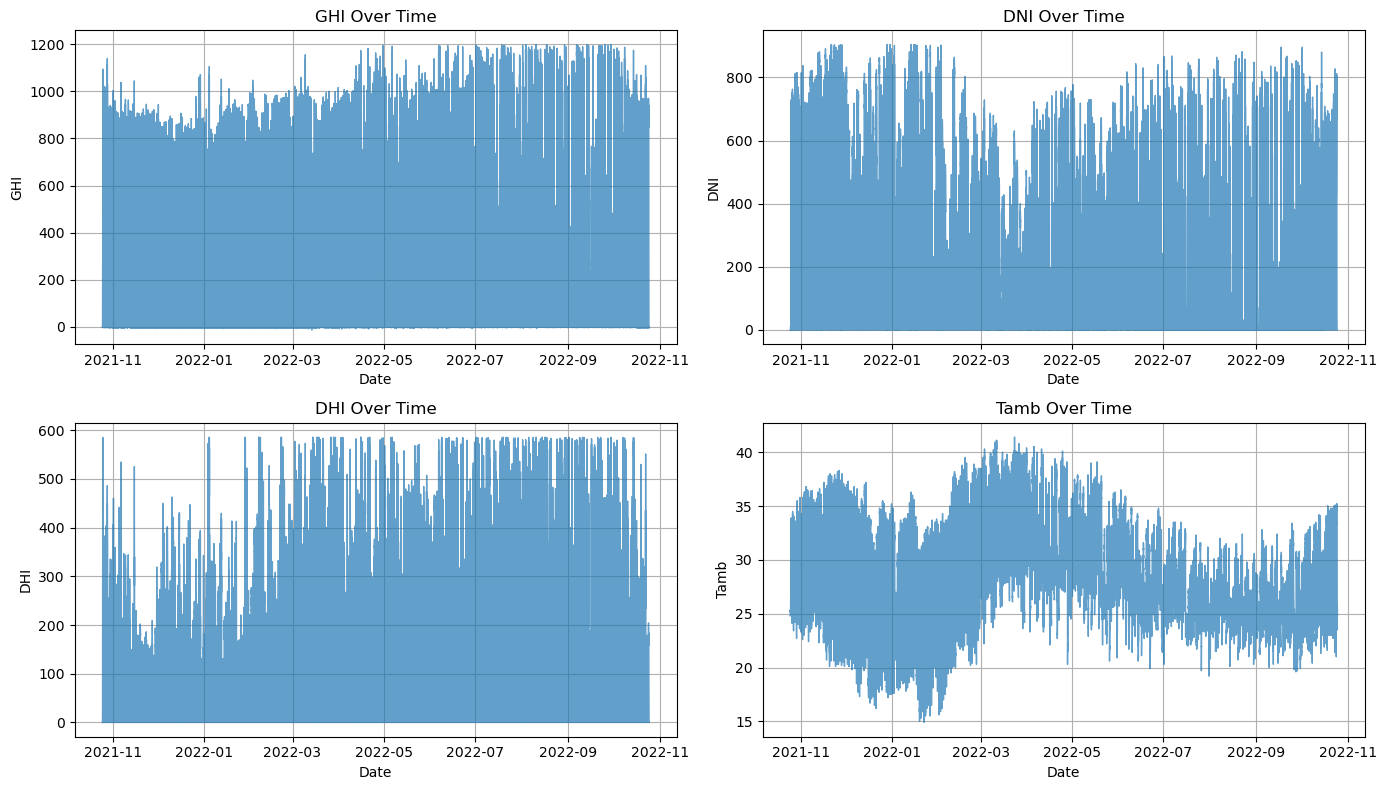

In [19]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(['GHI', 'DNI', 'DHI', 'Tamb'], 1):
    plt.subplot(2, 2, i)
    plt.plot(df.index, df[col], color='tab:blue', alpha=0.7, linewidth=1)
    plt.title(f'{col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

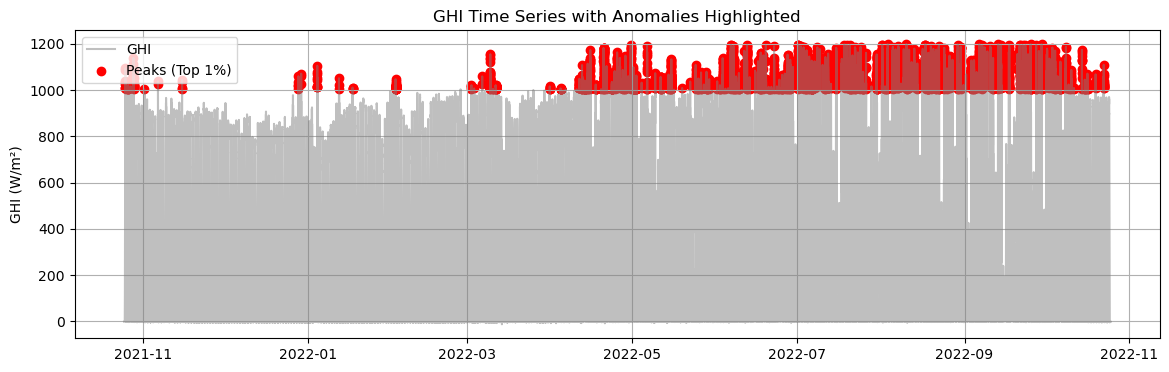

In [20]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['GHI'], color='gray', alpha=0.5, label='GHI')
plt.scatter(
    x=df.index[df['GHI'] > df['GHI'].quantile(0.99)],  # Top 1% values
    y=df.loc[df['GHI'] > df['GHI'].quantile(0.99), 'GHI'],
    color='red', 
    label='Peaks (Top 1%)'
)
plt.title('GHI Time Series with Anomalies Highlighted')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Load cleaned data
df = pd.read_csv("data/togo_clean.csv", parse_dates=['Timestamp'])
df

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9   
1      2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1   
2      2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2   
3      2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2   
4      2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0   
525596 2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0   
525597 2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0   
525598 2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0   
525599 2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          1.1      0.4  227.6      1.1  977         0            0.0   24.7   
1          1.6      0.4  229.3      0.7  977         0            0.0   24.7   
2          1.4      0.3  228.5      2.9  977         0            0.0   24.7   
3          1.6      0.3  229.1      4.6  977         0            0.0   24.7   
4          1.6      0.4  227.5      1.6  977         0            0.0   24.7   
...        ...      ...    ...      ...  ...       ...            ...    ...   
525595     0.0      0.0    0.0      0.0  977         0            0.0   24.3   
525596     0.0      0.0    0.0      0.0  977         0            0.0   24.3   
525597     0.0      0.0    0.0      0.0  977         0            0.0   24.2   
525598     0.0      0.0    0.0      0.0  977         0            0.0   24.1   
525599     0.0      0.0    0.0      0.0  977         0            0.0   24.1   

        TModB  Comments  
0        24.4       NaN  
1        24.4       NaN  
2        24.4       NaN  
3        24.4       NaN  
4        24.4       NaN  
...       ...       ...  
525595   24.0       NaN  
525596   24.0       NaN  
525597   23.9       NaN  
525598   23.8       NaN  
525599   23.8       NaN  

[525600 rows x 19 columns]

In [23]:
# Ensure cleaning flag column exists (adjust name if needed)
assert 'Cleaning' in df.columns, "Column 'Cleaning_Flag' not found!"
# Extract time features (for grouping)
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.date

In [24]:
cleaning_col = 'Cleaning'  
assert cleaning_col in df.columns, f"Column '{cleaning_col}' not found!"

In [25]:
print("\nUnique values in cleaning column:")
print(df[cleaning_col].unique())


Unique values in cleaning column:
[0 1]


In [26]:
df['Cleaning_Flag'] = df[cleaning_col].apply(lambda x: 1 if 'post' in str(x).lower() else 0)

In [27]:
# Example: Convert text labels to binary (adjust logic as needed)
if df[cleaning_col].dtype == object:
    df['Cleaning_Flag'] = df[cleaning_col].str.contains('post', case=False).astype(int)
else:
    df['Cleaning_Flag'] = df[cleaning_col]  # Assume already binary

# --- 3. Analysis ---
# Group by cleaning flag and compare ModA/ModB
impact = df.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean()
print("Average Performance:\n", impact)

Average Performance:
                      ModA        ModB
Cleaning_Flag                        
0              225.661641  218.936900
1              535.186477  532.211744


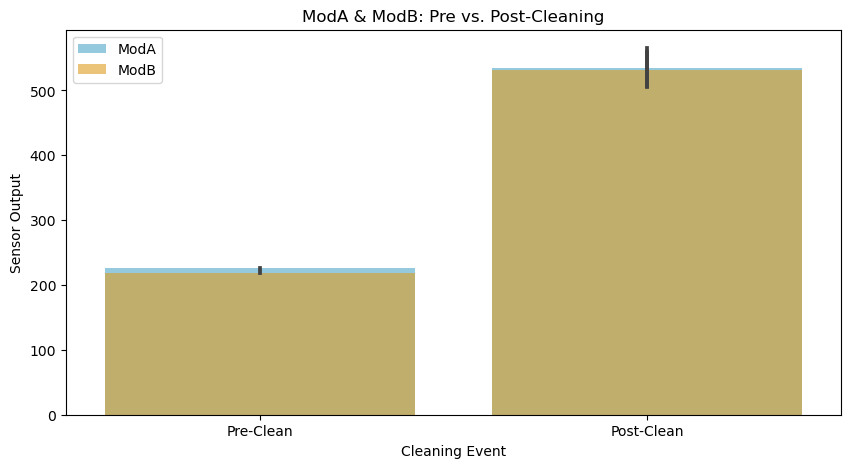

In [28]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    x=df['Cleaning_Flag'].map({0: 'Pre-Clean', 1: 'Post-Clean'}),
    y=df['ModA'],
    color='skyblue',
    label='ModA'
)
sns.barplot(
    x=df['Cleaning_Flag'].map({0: 'Pre-Clean', 1: 'Post-Clean'}),
    y=df['ModB'],
    color='orange',
    alpha=0.6,
    label='ModB'
)
plt.title('ModA & ModB: Pre vs. Post-Cleaning')
plt.ylabel('Sensor Output')
plt.xlabel('Cleaning Event')
plt.legend()
plt.show()

In [29]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'] 
corr_matrix = df[corr_cols].corr()

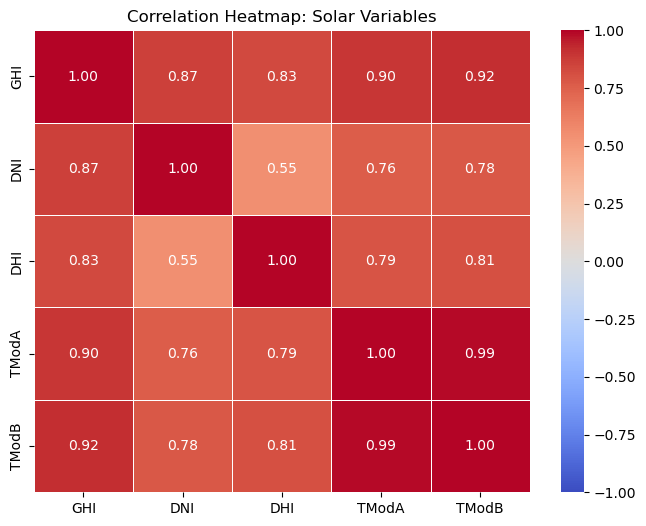

In [30]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap: Solar Variables")
plt.show()

Text(0, 0.5, 'GHI (W/m²)')

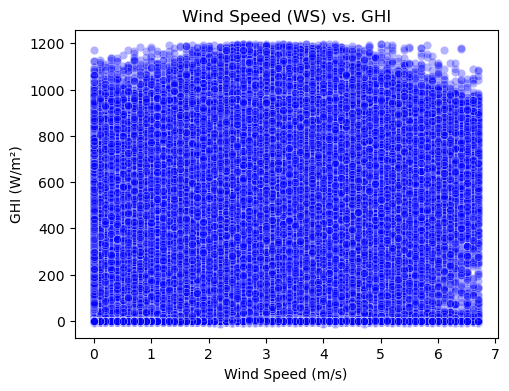

In [31]:
plt.figure(figsize=(12, 4))

# WS vs. GHI
plt.subplot(1, 2, 1)
sns.scatterplot(x='WS', y='GHI', data=df, alpha=0.3, color='blue')
plt.title("Wind Speed (WS) vs. GHI")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("GHI (W/m²)")

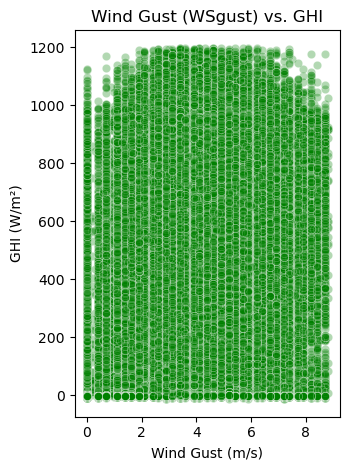

In [32]:
# WSgust vs. GHI
plt.subplot(1, 2, 2)
sns.scatterplot(x='WSgust', y='GHI', data=df, alpha=0.3, color='green')
plt.title("Wind Gust (WSgust) vs. GHI")
plt.xlabel("Wind Gust (m/s)")
plt.ylabel("GHI (W/m²)")
plt.tight_layout()
plt.show()

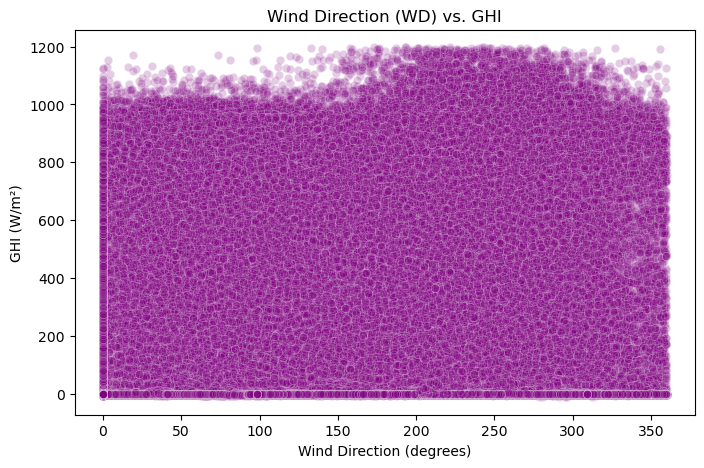

In [33]:
#Wind Direction (WD) vs. GHI

plt.figure(figsize=(8, 5))
sns.scatterplot(x='WD', y='GHI', data=df, alpha=0.2, color='purple')
plt.title("Wind Direction (WD) vs. GHI")
plt.xlabel("Wind Direction (degrees)")
plt.ylabel("GHI (W/m²)")
plt.show()

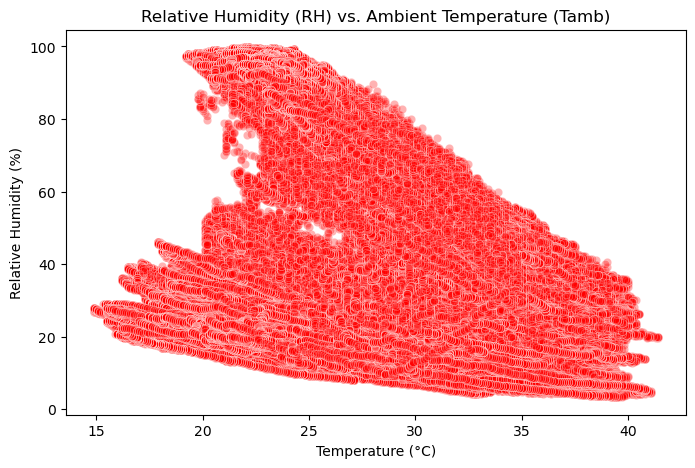

In [34]:
#Relative Humidity (RH) vs. Ambient Temperature (Tamb)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Tamb', y='RH', data=df, alpha=0.3, color='red')
plt.title("Relative Humidity (RH) vs. Ambient Temperature (Tamb)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.show()

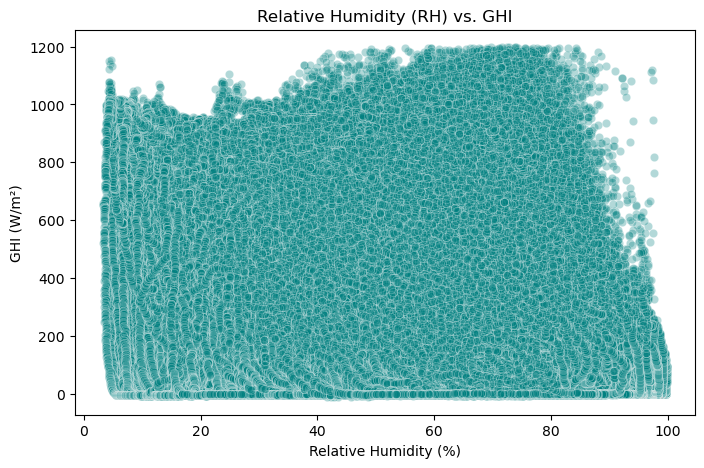

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.3, color='teal')
plt.title("Relative Humidity (RH) vs. GHI")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.show()

C:\Users\Hiwi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


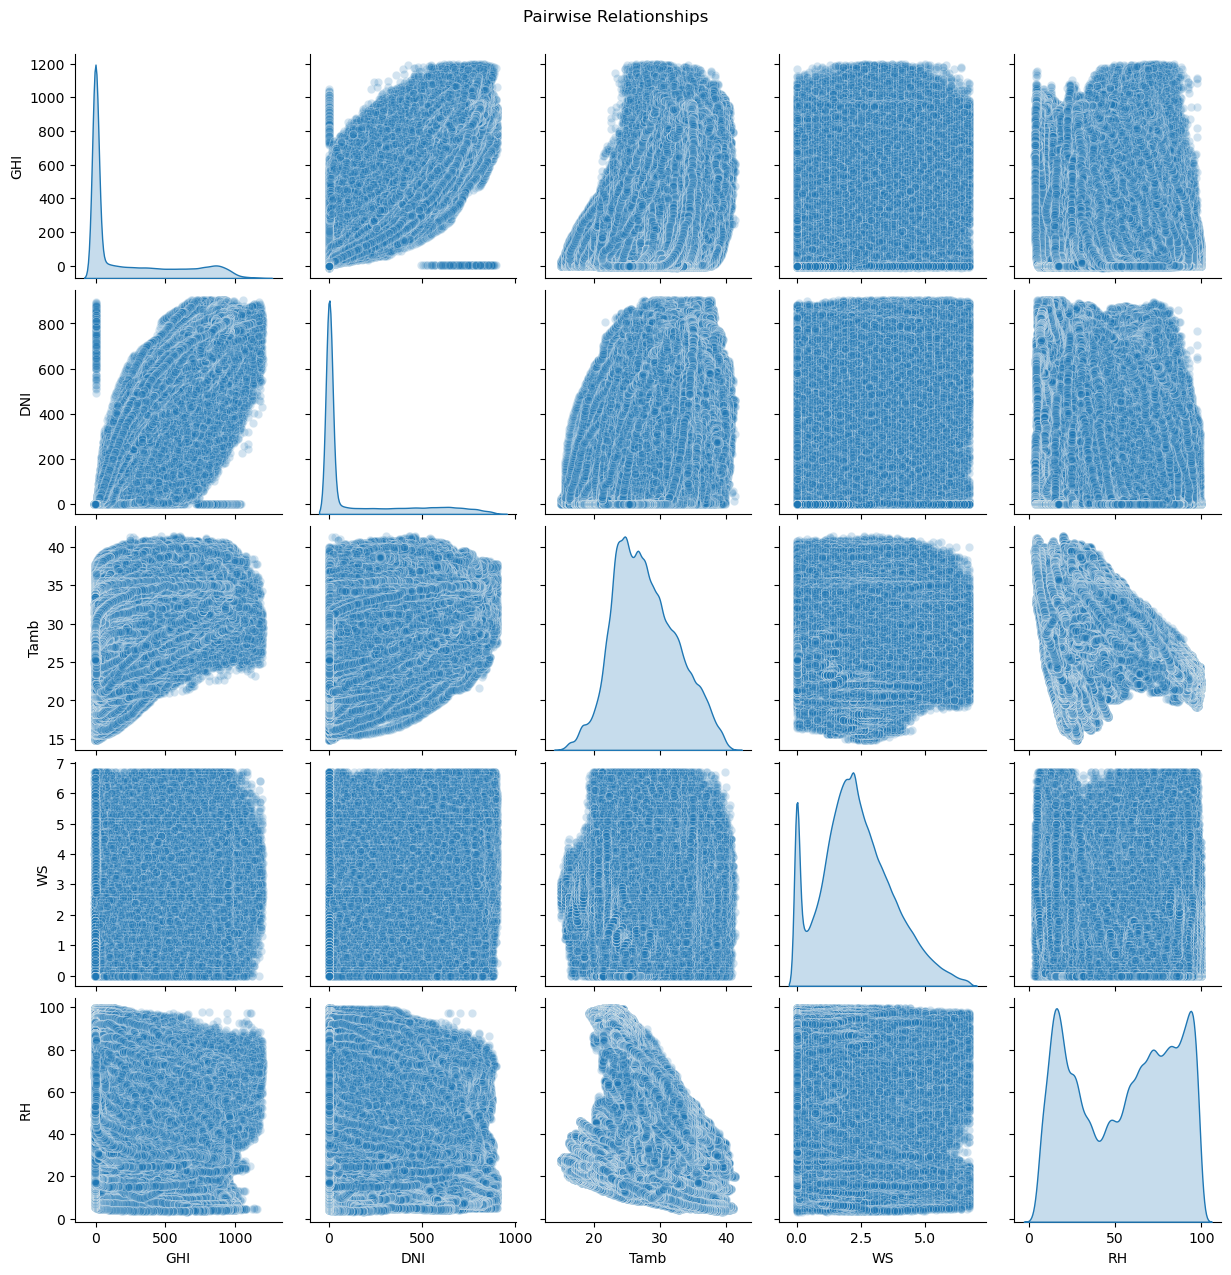

In [36]:
sns.pairplot(
    df[['GHI', 'DNI', 'Tamb', 'WS', 'RH']],
    diag_kind='kde',
    plot_kws={'alpha': 0.2}
)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

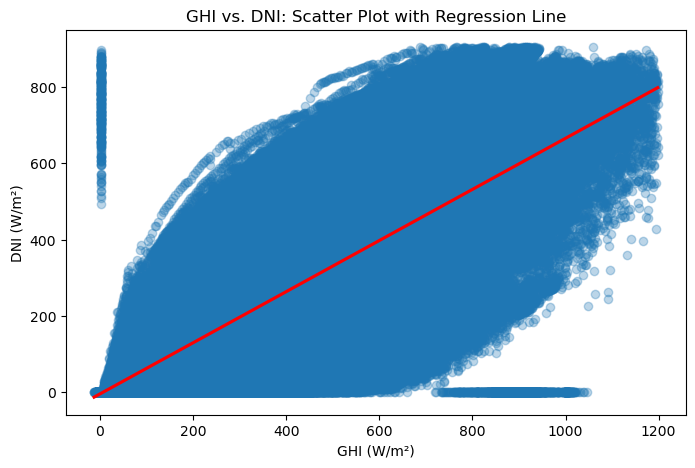

In [37]:
plt.figure(figsize=(8, 5))
sns.regplot(x='GHI', y='DNI', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title("GHI vs. DNI: Scatter Plot with Regression Line")
plt.xlabel("GHI (W/m²)")
plt.ylabel("DNI (W/m²)")
plt.show()